# Pipeline Automation and Model Monitoring

**Introduction to MLRun - a**

????

Tutorial steps:
- [**Run full workflow with train, optimze & deploy**](#full-workflow)

In [1]:
import mlrun
# get/create a project and register the data prep and trainer function in it
project = mlrun.get_or_create_project(
    name="huggingface-demo", context="./"
)

> 2023-01-30 14:01:02,727 [info] loaded project huggingface-demo from MLRun DB


In [2]:
project.set_function(name='server_tester', image='mlrun/ml-models',
                     handler='src.serving_test.model_server_tester', kind="job", with_repo=True)

<a id="full-workflow"></a>
## Run full workflow with train, optimze & deploy

You should use `project.set_workflow()` for load your workflow into the project, and when you can run it by using `project.run()` while the param name is key.


In [3]:
# Register the workflow file:
workflow_name = "training_workflow"
project.set_workflow(workflow_name, "src/training_workflow.py")

# Save the project:
project.save()

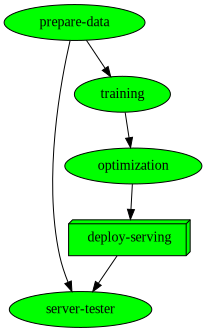

uid,start,state,name,parameters,results
...8e69880b,Jan 30 14:14:15,completed,server_tester,label_column=labelsendpoint=http://huggingface-demo-serving-huggingface-demo.default-tenant.app.cto-office.iguazio-cd1.com/,count=100error_count=0avg_latency=57527min_latency=10988max_latency=116560
...ac984585,Jan 30 14:09:52,completed,optimization,model_path=store://artifacts/huggingface-demo/trained_model:a386d1d2-8729-4789-8bc0-7f37dd49ec1d,
...1bf9ccec,Jan 30 14:01:37,completed,training,pretrained_tokenizer=distilbert-base-uncasedpretrained_model=distilbert-base-uncased,loss=0.0604learning_rate=0.0eval_loss=0.18776781857013702eval_accuracy=0.9366666666666666eval_f1=0.8256880733944955eval_runtime=10.1482eval_samples_per_second=29.562eval_steps_per_second=1.872train_runtime=441.8427train_samples_per_second=6.79train_steps_per_second=0.425total_flos=34259380977408.0
...16d2a798,Jan 30 14:01:12,completed,prepare_data,dataset_name=Shayanvsf/US_Airline_Sentiment,


In [4]:
workflow_run = project.run(
    name=workflow_name,
    arguments={
        "dataset_name": "Shayanvsf/US_Airline_Sentiment",
        "pretrained_tokenizer": "distilbert-base-uncased",
        "pretrained_model": "distilbert-base-uncased",
    },
    watch=True,
    dirty=True
)

Here we can see how the workflow looks on our UI & Also the result of the trainer and the server_tester

<img src="./images/workflow.png" alt="workflow" width="1200"/>

<img src="./images/latancy.png" alt="latancy" width="1200"/>

In [5]:
serving_function = project.get_function("serving")

In [6]:
body = "i love flying"
response = serving_function.invoke(path='/predict', body=body)
print(response)

> 2023-01-30 14:14:40,516 [info] invoking function: {'method': 'POST', 'path': 'http://nuclio-huggingface-demo-serving.default-tenant.svc.cluster.local:8080/predict'}
['The sentiment is POSITIVE', 'The prediction score is 0.10024257749319077']
